In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df1 = pd.read_csv("Test set.csv")
df2 = pd.read_csv("Training set.csv")

In [3]:
df3 = pd.concat([df1,df2],axis=0)

In [4]:
df3.shape

(3205, 3)

In [5]:
df3.isnull().sum()

Height    0
Weight    0
Sex       0
dtype: int64

In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3205 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3205 non-null   float64
 1   Weight  3205 non-null   float64
 2   Sex     3205 non-null   object 
dtypes: float64(2), object(1)
memory usage: 100.2+ KB


In [7]:
df3.head()

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [8]:
## We do not need "Sex" column so we drop this column

In [9]:
df3.drop(columns=['Sex'],axis=0,inplace= True)

In [10]:
df3.head()

,Height,Weight
0,146.323241,59.861065
1,175.695412,77.863687
2,183.216164,72.131992
3,184.245269,77.546000
4,132.302261,55.188496


<Axes: >

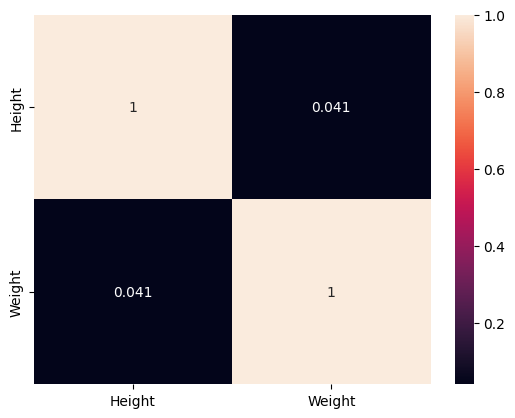

In [11]:
sns.heatmap(df3.corr(),annot=True)

<Axes: xlabel='Height', ylabel='Weight'>

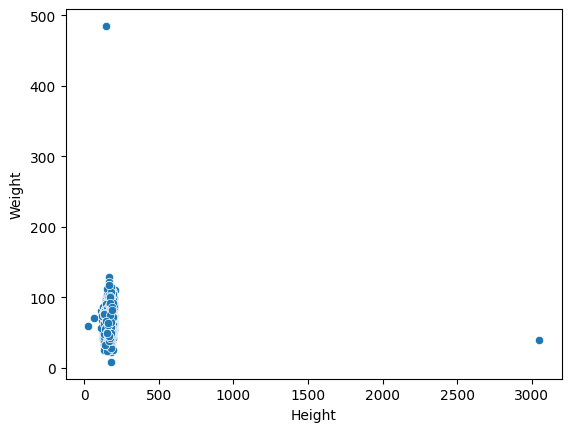

In [12]:
sns.scatterplot(x=df3['Height'],y=df3['Weight'])

<Axes: >

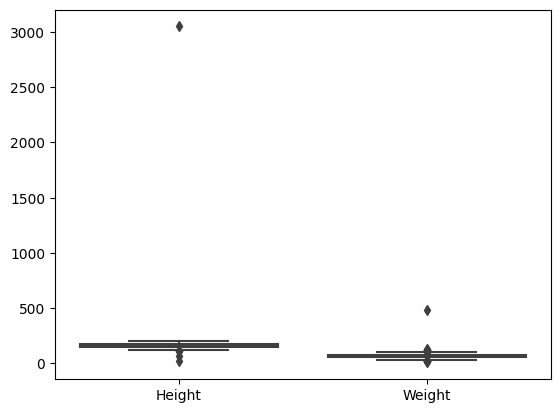

In [13]:
sns.boxplot(df3[['Height','Weight']])

In [14]:
def outlier(data):
    
    q1 = np.percentile((data),25)
    q3 = np.percentile((data),75)
    IQR = (q3 - q1)
    lower_bound = (q1 - (1.5*(IQR)))
    upper_bound = (q3 + (1.5*(IQR)))
    outlier = [x for x in data if ((upper_bound < x) | (x < lower_bound))]
    return outlier

In [15]:
height_outlier = outlier(df3['Height'])
height_outlier

[110.81, 3050.0, 115.94, 25.68, 65.8, 112.6]

In [16]:
weight_outlier  = outlier(df3['Weight'])
weight_outlier 

[129.410122,
 113.2503094,
 117.7668917,
 110.01,
 111.01,
 108.43,
 22.4,
 25.5,
 115.18,
 111.46,
 121.98,
 109.88,
 108.83,
 24.14,
 115.05,
 112.28,
 27.73,
 109.83,
 25.9,
 485.0,
 25.59,
 115.13,
 111.45,
 8.53,
 110.79,
 24.57,
 113.09,
 117.99,
 112.26,
 114.66,
 117.97]

In [17]:
df4 = df3[~df3['Height'].isin(height_outlier)]    ## Removing outliers

In [18]:
df5 = df4[~df4['Weight'].isin(weight_outlier)]   ## Removing outliers

In [19]:
df5.shape

(3168, 2)

<Axes: >

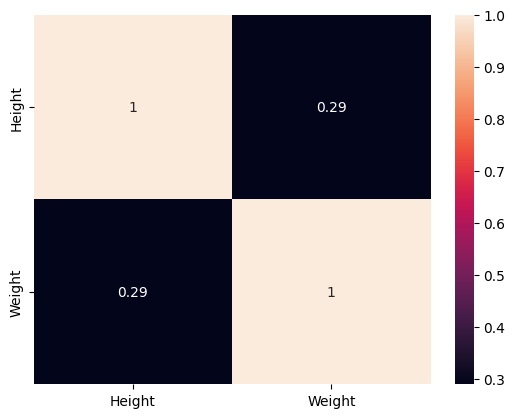

In [20]:
sns.heatmap(df5.corr(),annot=True)

<Axes: xlabel='Height', ylabel='Weight'>

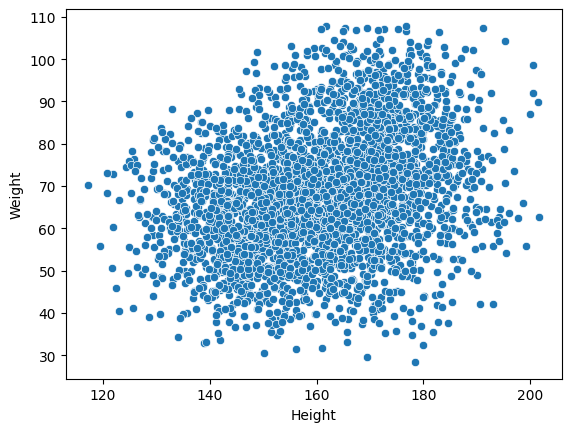

In [21]:
sns.scatterplot(x=df5['Height'],y=df5['Weight'])

<Axes: >

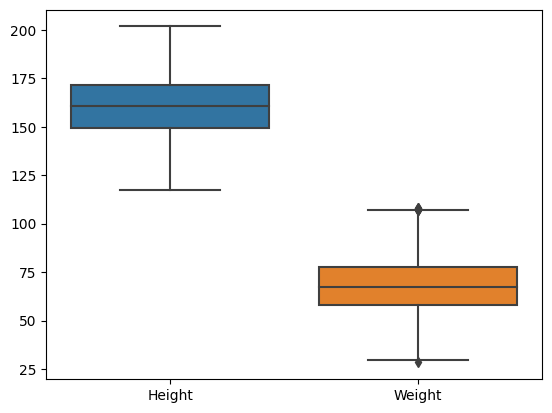

In [22]:
sns.boxplot(df5[['Height','Weight']])

In [23]:
## Dividing independent and dependent variable

X = df4[['Height']]
y = df4[['Weight']]

In [24]:
## Spliiting the dataset as train 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [25]:
## Scalling the data

from sklearn.preprocessing import StandardScaler
scalerx = StandardScaler()
scalery = StandardScaler()

In [26]:
X_train = scalerx.fit_transform(X_train)
X_test = scalerx.transform(X_test)

In [27]:
y_train = scalery.fit_transform(y_train)
y_test = scalery.transform(y_test)

<Axes: >

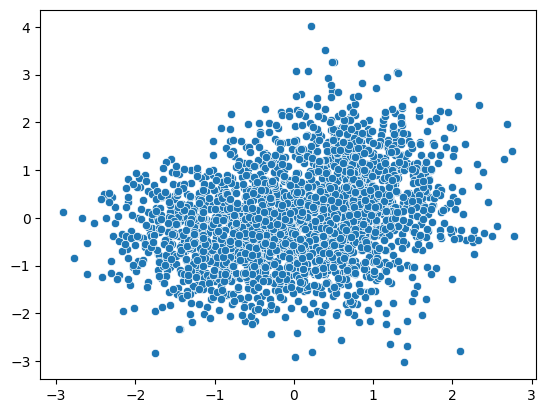

In [28]:
sns.scatterplot(x=np.array(X_train).reshape(-1),y=np.array(y_train).reshape(-1))

In [29]:
## Training and evaluating model

from sklearn.linear_model import LinearRegression
L_regressor = LinearRegression()

In [30]:
L_regressor.fit(X_train,y_train)

LinearRegression()

In [31]:
L_regressor_y_pred = L_regressor.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [33]:
mse = mean_squared_error(y_test,L_regressor_y_pred)
print(mse)
mae = mean_absolute_error(y_test,L_regressor_y_pred)
print(mae)
r2 = r2_score(y_test,L_regressor_y_pred)
print(r2)
rmse = np.sqrt(mse)
print(rmse)

1.894613195556679
0.7944557189641478
0.03727474495173588
1.3764494889231058


In [34]:
from sklearn.svm import SVR
SVR = SVR()

In [35]:
SVR.fit(X_train,y_train)

SVR()

In [36]:
SVR_y_pred = SVR.predict(X_test)

In [37]:
mse = mean_squared_error(y_test,SVR_y_pred)
print(mse)
mae = mean_absolute_error(y_test,SVR_y_pred)
print(mae)
r2 = r2_score(y_test,SVR_y_pred)
print(r2)
rmse = np.sqrt(mse)
print(rmse)

1.8908865187537751
0.7851314648360294
0.03916841162943685
1.375095094440299


In [38]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()

In [39]:
DTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [40]:
DTR_y_pred = DTR.predict(X_test)

In [41]:
mse = mean_squared_error(y_test,DTR_y_pred)
print(mse)
mae = mean_absolute_error(y_test,DTR_y_pred)
print(mae)
r2 = r2_score(y_test,DTR_y_pred)
print(r2)
rmse = np.sqrt(mse)
print(rmse)

2.7512920564716694
1.0912082647218653
-0.3980364715029303
1.6587019191137597


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [43]:

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=1))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))  # Output layer


model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=30, verbose=1, validation_split=0.2)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Epoch 1/50
64/64 [==============================] - 5s 19ms/step - loss: 0.9284 - val_loss: 0.9525
Epoch 2/50
64/64 [==============================] - 1s 9ms/step - loss: 0.9120 - val_loss: 0.9563
Epoch 3/50
64/64 [==============================] - 1s 9ms/step - loss: 0.9103 - val_loss: 0.9581
Epoch 4/50
64/64 [==============================] - 1s 10ms/step - loss: 0.9116 - val_loss: 0.9572
Epoch 5/50
64/64 [==============================] - 1s 10ms/step - loss: 0.9098 - val_loss: 0.9552
Epoch 6/50
64/64 [==============================] - 1s 9ms/step - loss: 0.9089 - val_loss: 0.9512
Epoch 7/50
64/64 [==============================] - 1s 9ms/step - loss: 0.9092 - val_loss: 0.9510
Epoch 8/50
64/64 [==============================] - 1s 9ms/step - loss: 0.9101 - val_loss: 0.9503
Epoch 9/50
64/64 [==============================] - 1s 9ms/step - loss: 0.9068 - val_loss: 0.9538
Epoch 10/50
64/64 [==============================] - 1s 9ms/step - loss: 0.9073 - val_loss: 0.9529
Epoch 11/50
64/6

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
RFR = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

In [46]:
RFR.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [47]:
RFR_y_pred = RFR.predict(X_test)

In [48]:
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

1.886995930158686
1.3736797043556719


In [49]:
def prediction(height):
    height = [[height]]
    scaled_height = scalerx.transform(height)
    predicted_weight = model.predict(scaled_height)
    weight = scalery.inverse_transform(predicted_weight)
    return weight

In [55]:
## Updating our dataset with weight and bmi

In [56]:
data = pd.read_csv(r"C:\Users\HP\Desktop\PW_Projects\BMI_from_image_project\notebook\image_names_with_height_data.csv")

In [57]:
data.head()

,Unnamed: 0,image_name,height
0,0,John-Ritter.jpg,179
1,1,Yves-Montand.jpg,181
2,2,Andy-Williams.jpg,166
3,3,River-Phoenix.jpg,174
4,4,Arthur-Penn.jpg,164


In [61]:
weight = []
for i in data['height']:
    wght = prediction(i)
    weight.append(wght)

1/1 [==============================] - 0s 78ms/step


In [64]:
data['weight'] = weight
data['weight'] = [i[0][0] for i in data["weight"]]

In [65]:
data.head()

,Unnamed: 0,image_name,height,weight
0,0,John-Ritter.jpg,179,73.556503
1,1,Yves-Montand.jpg,181,73.591438
2,2,Andy-Williams.jpg,166,70.274612
3,3,River-Phoenix.jpg,174,72.594604
4,4,Arthur-Penn.jpg,164,69.359749


In [66]:
## We have weight in kg but we need height in meters from centmeter for getting BMI

In [67]:
data['height'] = [(i*0.01) for i in data["height"]]

In [68]:
data.head()

,Unnamed: 0,image_name,height,weight
0,0,John-Ritter.jpg,1.79,73.556503
1,1,Yves-Montand.jpg,1.81,73.591438
2,2,Andy-Williams.jpg,1.66,70.274612
3,3,River-Phoenix.jpg,1.74,72.594604
4,4,Arthur-Penn.jpg,1.64,69.359749


In [70]:
data['height_sqr'] =[(i**2) for i in data['height']]

In [72]:
data.head()

,Unnamed: 0,image_name,height,weight,height_sqr
0,0,John-Ritter.jpg,1.79,73.556503,3.2041
1,1,Yves-Montand.jpg,1.81,73.591438,3.2761
2,2,Andy-Williams.jpg,1.66,70.274612,2.7556
3,3,River-Phoenix.jpg,1.74,72.594604,3.0276
4,4,Arthur-Penn.jpg,1.64,69.359749,2.6896


In [73]:
data['BMI'] = data['weight']/data['height_sqr']

In [74]:
data.head()

,Unnamed: 0,image_name,height,weight,height_sqr,BMI
0,0,John-Ritter.jpg,1.79,73.556503,3.2041,22.956994
1,1,Yves-Montand.jpg,1.81,73.591438,3.2761,22.463123
2,2,Andy-Williams.jpg,1.66,70.274612,2.7556,25.502472
3,3,River-Phoenix.jpg,1.74,72.594604,3.0276,23.977608
4,4,Arthur-Penn.jpg,1.64,69.359749,2.6896,25.788128


In [75]:
data.drop(columns=['Unnamed: 0'],axis=0,inplace = True)

In [76]:
data = data[["image_name","height","weight","BMI"]]

In [77]:
data.head()

,image_name,height,weight,BMI
0,John-Ritter.jpg,1.79,73.556503,22.956994
1,Yves-Montand.jpg,1.81,73.591438,22.463123
2,Andy-Williams.jpg,1.66,70.274612,25.502472
3,River-Phoenix.jpg,1.74,72.594604,23.977608
4,Arthur-Penn.jpg,1.64,69.359749,25.788128


In [79]:
data.to_csv("image_height_weight_BMI_data.csv")